#**ĐỒ ÁN CUỐI KÌ MÔN MÁY HỌC CS114.O11.KHCL**
#NHẬN DIỆN ....

## Giảng viên:

*   Lê Đình Duy
*   Phạm Nguyễn Trường An

## Các thành viên thực hiện đồ án:


*   Hồ Trung Tín
*   Trần Nhật Đức
*   Phạm Đức Toàn






In [1]:
!nvidia-smi

Mon Jan 22 14:47:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              14W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Git clone source code và install environment

In [3]:
%cd /content/drive/MyDrive
!git clone https://github.com/ultralytics/yolov5

/content/drive/MyDrive
Cloning into 'yolov5'...
remote: Enumerating objects: 16383, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (206/206), done.
remote: Total 16383 (delta 138), reused 153 (delta 71), pack-reused 16106
Receiving objects: 100% (16383/16383), 15.09 MiB | 10.03 MiB/s, done.
Resolving deltas: 100% (11176/11176), done.


In [17]:
%cd /content/drive/MyDrive/yolov5
!pip install -r requirements.txt

/content/drive/MyDrive/yolov5


## Prepare data


In [9]:
%cd /content/drive/MyDrive/yolov5/data


/content/drive/MyDrive/yolov5/data


In [10]:
!unzip /content/drive/MyDrive/CS114/data.zip

Archive:  /content/drive/MyDrive/CS114/data.zip
   creating: data/
   creating: data/images/
   creating: data/images/test/
  inflating: data/images/test/10.jpg  
  inflating: data/images/test/103.jpg  
  inflating: data/images/test/108.jpg  
  inflating: data/images/test/11.jpg  
  inflating: data/images/test/111.jpg  
  inflating: data/images/test/113.jpg  
  inflating: data/images/test/124.jpg  
  inflating: data/images/test/126.jpg  
  inflating: data/images/test/128.jpg  
  inflating: data/images/test/135.jpg  
  inflating: data/images/test/150.jpg  
  inflating: data/images/test/154.jpg  
  inflating: data/images/test/157.jpg  
  inflating: data/images/test/163.jpg  
  inflating: data/images/test/172.jpg  
  inflating: data/images/test/177.jpg  
  inflating: data/images/test/186.jpg  
  inflating: data/images/test/188.jpg  
  inflating: data/images/test/191.jpg  
  inflating: data/images/test/196.jpg  
  inflating: data/images/test/205.jpg  
  inflating: data/images/test/206.jpg 

Kiểm tra lại sau khi giải nén thì folder images/ và labels/ phải nằm trong yolov5/data như sau

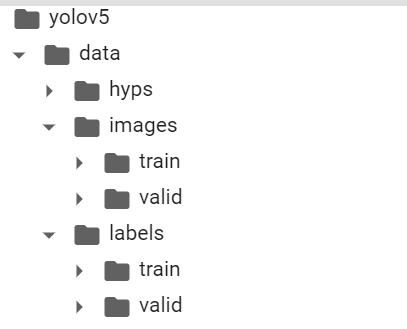

In [13]:
# Thay file config bằng file chúng em đã cấu hình sẵn
%cd /content/drive/MyDrive/yolov5/data


/content/drive/MyDrive/yolov5/data


## Train

In [20]:
!python /content/drive/MyDrive/yolov5/train.py \
        --img 416 \
        --batch 16 \
        --epochs 300 \
        --data  dataset.yaml\
        --weights yolov5s.pt

2024-01-22 16:02:28.998993: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 16:02:28.999048: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 16:02:29.000418: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, o

## Detect

### Detect on images

In [25]:
# detect 1 ảnh
%cd /content/drive/MyDrive/yolov5
!python detect.py \
        --data /content/drive/MyDrive/yolov5/data/dataset.yaml\
        --source /content/drive/MyDrive/yolov5/data/images/test/356.jpg \
        --weights /content/drive/MyDrive/yolov5/runs/train/exp8/weights/best.pt \
        --conf 0.5 \
        --save-txt \
        --save-conf

/content/drive/MyDrive/yolov5
detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp8/weights/best.pt'], source=/content/drive/MyDrive/yolov5/data/images/test/356.jpg, data=/content/drive/MyDrive/yolov5/data/dataset.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-278-g050c72c Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/yolov5/data/images/test/356.jpg: 384x640 4 masks, 101.6ms
Speed: 0.8ms pre-process, 101.6ms inference, 946.3ms NMS per image at shap

In [22]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

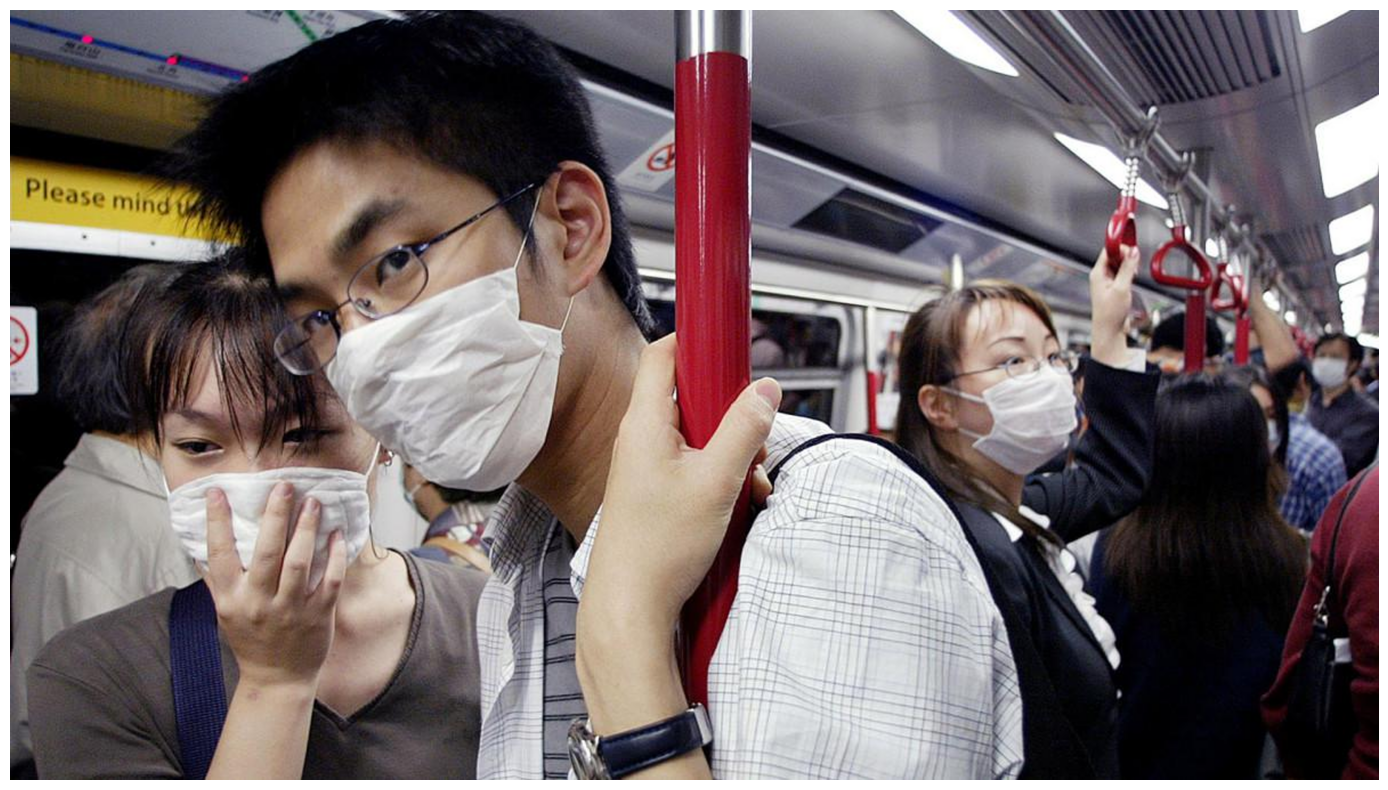

In [26]:
imShow('/content/drive/MyDrive/yolov5/data/images/test/356.jpg')

### Detect on video


In [30]:
%cd /content/drive/MyDrive/yolov5
!python detect.py \
        --source /content/drive/MyDrive/CS114/1.mp4 \
        --data data/coco128.yaml \
        --weight /content/drive/MyDrive/yolov5/runs/train/exp8/weights/best.pt \
        --conf 0.4 \
        --save-conf

/content/drive/MyDrive/yolov5
detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp8/weights/best.pt'], source=/content/drive/MyDrive/CS114/1.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-278-g050c72c Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1128) /content/drive/MyDrive/CS114/1.mp4: 384x640 4 masks, 8 nomasks, 62.0ms
video 1/1 (2/1128) /content/drive/MyDrive/CS114/1.mp4: 384x640 4 masks, 8 nomasks, 7.9ms
video 1/1 (3/1128) /content/drive/MyDrive/CS114/1.mp4: 384x640 4 masks, 8 nom

### Đánh giá file weight train

In [28]:
!python val.py --weights /content/drive/MyDrive/yolov5/runs/train/exp8/weights/best.pt --verbose

val: data=data/coco128.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp8/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-278-g050c72c Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/yolov5/data/labels/test.cache... 78 images, 0 backgrounds, 0 corrupt: 100% 78/78 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/yolov5/data/images/test/282.jpg: corrupt JPEG restored and saved
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:07<00:00,  2.35s/it]
                   all         78        412      0.924      0.782    